# Tutorial on visualizing diversity data in R

### Start by loading libraries and your data

In [1]:
library(vegan)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3) # Ignore this one.

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


In [2]:
collemboladat <- read.delim("collembolaMar5.txt", sep="\t") #Can also do using RStudio "Import Dataset" in Environment Tab

In [3]:
microbe3dat <- read.delim("microbesLevel3.txt", sep="\t")

### look at your data

In [4]:
print(names(collemboladat))# Just the column headers in this case. Do the same for microbe data...

 [1] "Site"     "Distance" "E1"       "E2"       "E3"       "E5"      
 [7] "E6"       "E7"       "E8"       "E9"       "E10"      "E12"     
[13] "E13"      "E14"      "E15"      "E16"      "P1"       "P3"      
[19] "P4"       "P5"       "P6"       "P7"       "P8"       "P9"      
[25] "P10"      "S4"       "S9"       "N5"       "N6"      


columns for each group... E is 3:16, P 17:25, S 26:27, N 28:29

In [5]:
dim(microbe3dat); names(microbe3dat)

[1] 12 59

[1] "Site"                                     
 [2] "replicate"                                
 [3] "Acidobacteria.Acidobacteriia"             
 [4] "Acidobacteria.Blastocatellia..Subgroup.4."
 [5] "Acidobacteria.Holophagae"                 
 [6] "Acidobacteria.Subgroup.6"                 
 [7] "Actinobacteria.Acidimicrobiia"            
 [8] "Actinobacteria.Actinobacteria"            
 [9] "Actinobacteria.Coriobacteriia"            
[10] "Actinobacteria.Thermoleophilia"           
[11] "Actinobacteria.unid"                      
[12] "Armatimonadetes.Armatimonadia"            
[13] "Bacteroidetes.Bacteroidia"                
[14] "Bacteroidetes.Ignavibacteria"             
[15] "Bacteroidetes.Rhodothermia"               
[16] "Chlamydiae.Chlamydiae"                    
[17] "Chloroflexi.Anaerolineae"                 
[18] "Chloroflexi.Chloroflexia"                 
[19] "Chloroflexi.Dehalococcoidia"              
[20] "Chloroflexi.KD4.96"                       
[21] "Chloroflexi.SL56.marine.group"            
[22] "Cloacimonetes.Cloacimonadia"              
[23] "Cyanobacteria.Melainabacteria"            
[24] "Cyanobacteria.Oxyphotobacteria"           
[25] "Deinococcus.Thermus.Deinococci"           
[26] "Dependentiae.Babeliae"                    
[27] "Elusimicrobia.Endomicrobia"               
[28] "Epsilonbacteraeota.Campylobacteria"       
[29] "Fibrobacteres.Fibrobacteria"              
[30] "Firmicutes.Bacilli"                       
[31] "Firmicutes.Clostridia"                    
[32] "Firmicutes.Erysipelotrichia"              
[33] "Firmicutes.Negativicutes"                 
[34] "Fusobacteria.Fusobacteriia"               
[35] "Gemmatimonadetes.Gemmatimonadetes"        
[36] "Kiritimatiellaeota.Kiritimatiellae"       
[37] "Lentisphaerae.Lentisphaeria"              
[38] "Lentisphaerae.Oligosphaeria"              
[39] "Nitrospinae.P9X2b3D02"                    
[40] "Omnitrophicaeota.Omnitrophia"             
[41] "Patescibacteria.ABY1"                     
[42] "Patescibacteria.Berkelbacteria"           
[43] "Patescibacteria.Gracilibacteria"          
[44] "Patescibacteria.Parcubacteria"            
[45] "Patescibacteria.Saccharimonadia"          
[46] "Planctomycetes.Phycisphaerae"             
[47] "Planctomycetes.Planctomycetacia"          
[48] "Planctomycetes.vadinHA49"                 
[49] "Proteobacteria.Alphaproteobacteria"       
[50] "Proteobacteria.Deltaproteobacteria"       
[51] "Proteobacteria.Gammaproteobacteria"       
[52] "Proteobacteria.unid"                      
[53] "Spirochaetes.Leptospirae"                 
[54] "Spirochaetes.Spirochaetia"                
[55] "Verrucomicrobia.Verrucomicrobiae"         
[56] "WPS.2.uncultured.rumen.bacterium"         
[57] "Bacteria"                                 
[58] "Unassigned"                               
[59] "SUM"

#### We should check that it's a data from using: 

In [6]:
is.data.frame(collemboladat)

[1] TRUE

### Create a matrix that holds your summarized results... this will be easier to deal with.

In [7]:
myresultsC <- collemboladat[,1:2] #all rows, and columns 1 through 2
myresultsM <- microbe3dat[,1:2] 

### Calculate summary stats
We will use the `apply()` function. Use `?apply` to see the documentation. `apply` takes the data you want to consider, a 1 if you want to apply the function to each row or a 2 if you want to apply the function to each column, and then the function. 

First we'll calculate: Total number of individuals (allIndiv); Total number of individuals per group (xIndiv)

In [8]:
allIndivC <- apply(collemboladat[,3:29], 1, sum)
allIndivM <- apply(microbe3dat[,3:57], 1, sum) #excluding unassigned and Sum
eIndivC <- apply(collemboladat[,3:16], 1, sum)
pIndivC <- apply(collemboladat[,17:25], 1, sum)
sIndivC <- apply(collemboladat[,26:27], 1, sum)
nIndivC <- apply(collemboladat[,28:29], 1, sum)

#Example for all Actinobacteria
actinoIndiv <- apply(microbe3dat[,3:11], 1, sum)

Next we can calculate counts... this is presence/absence and just a tad more complicated. We use the same `apply` function as above, but for the function part, we look at each value in a row (x) and check if it's 0 or not 0 (`!=`) and then sum the number of not 0 values. 

In [9]:
allTaxaC <- apply(collemboladat[,3:29], 1, function(x) sum(x!=0))
allTaxaM <- apply(microbe3dat[,3:57], 1, function(x) sum(x!=0))

In [10]:
eTaxaC <- apply(collemboladat[,3:16], 1, function(x) sum(x!=0))
pTaxaC <- apply(collemboladat[,17:25], 1, function(x) sum(x!=0))
sTaxaC <- apply(collemboladat[,26:27], 1, function(x) sum(x!=0))
nTaxaC <- apply(collemboladat[,28:29], 1, function(x) sum(x!=0))
                
actinoCount <- apply(microbe3dat[,3:11], 1, function(x) sum(x!=0))

In [11]:
shannonC <- diversity(collemboladat[,3:29])
shannonM <- diversity(microbe3dat[,3:57])

### Use cbind to add these to your results table
Note that if you get an error, it's likely because the info is not all on one line in RStudio... you can fix this. 

In [12]:
myresultsC <- cbind(myresultsC, allIndivC, eIndivC, pIndivC,
                   sIndivC, nIndivC, allTaxaC, eTaxaC, 
                   pTaxaC, sTaxaC, nTaxaC, shannonC)

In [13]:
myresultsM <- cbind(myresultsM, allIndivM, actinoIndiv, allTaxaM, 
                    actinoCount, shannonM)

# Also want to add column that is proportional actino
myresultsM <- cbind(myresultsM, actinoProp=actinoIndiv/allIndivM)

## Use ggplot to plot
This will take the most effort by you. You will really need to think about how best to visualize the data. The following show you some example plots, but you need to think about what will work best for you. That could mean calculating more summary stats even. 

The general format is to use the `ggplot()` function to set the variables and then following to plot the graph. Examples include `geom_point()` and `geom_boxplot()`. You can also set `ggtitle()`, `xlab()` etc.

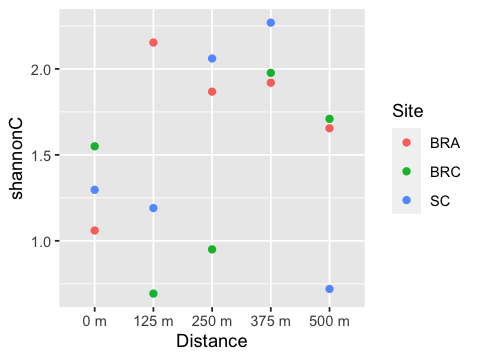

In [14]:
p <- ggplot(myresultsC, aes(x=Distance, y=shannonC, col=Site)) +
        geom_point(pch=16, cex=2)
p

In [15]:
p <- p + ylab("Shannon Diversity")

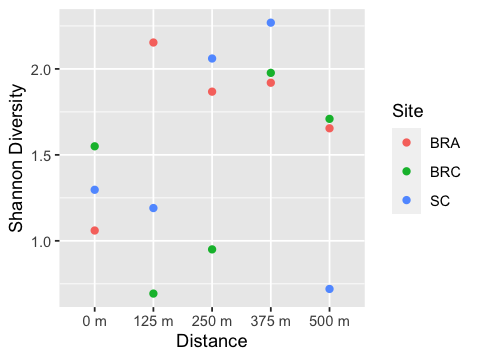

In [16]:
p

In [17]:
myresultsM

Site,replicate,allIndivM,actinoIndiv,allTaxaM,actinoCount,shannonM,actinoProp
<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
CM,1,10146,2376,28,3,1.976199,0.23418096
CM,2,7169,2292,21,3,1.714867,0.31970986
CM,3,10442,2155,24,5,1.986934,0.20637809
CM,4,11344,2262,29,5,2.058571,0.19940056
EM,1,6424,1225,19,3,1.881957,0.19069116
EM,2,6302,1450,16,1,1.884905,0.23008569
EM,3,10270,1536,23,5,2.073915,0.14956183
EM,4,13111,2640,23,3,1.641050,0.20135764
FM,1,12398,2559,46,8,2.542172,0.20640426


In [18]:
myresultsM$replicate <- as.factor(myresultsM$replicate) 
#Makes replicate a factor instead of a continuous variable

In [19]:
micp <- ggplot(myresultsM, aes(x=Site, y=shannonM, col=replicate)) +
        geom_point(pch=16, cex=2)

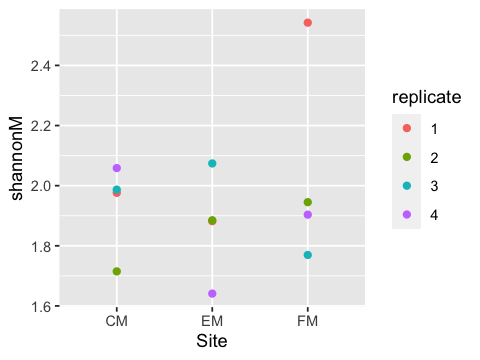

In [20]:
micp

In [21]:
divM <- ggplot(myresultsM, aes(x=Site, y=actinoProp, col=replicate)) + geom_point()

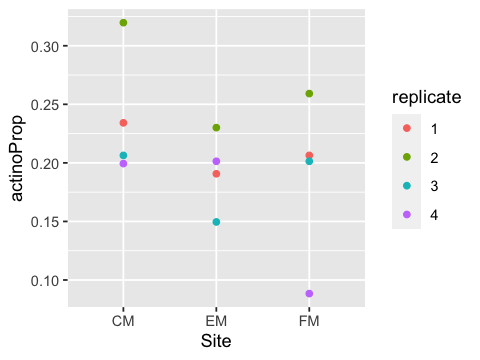

In [22]:
divM

In [25]:
divMbox <- ggplot(myresultsM, aes(x=Site, y=actinoProp)) + geom_boxplot()

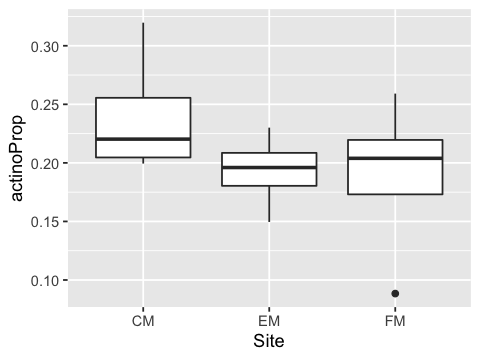

In [26]:
divMbox

### Edit the plot by adding different elements
for example, title with `ggtitle` or x and y labels with `xlab` and `ylab`.
Note that divMbox from above is the variable that holds the plot. I add the elements to it with a `+` and then store that as the original divMbox variable. You don't *have* to store as that variable. There are pluses and minuses to doing so.

In [29]:
divMbox <- divMbox + ggtitle("Proportion Actinobacteria across sites")

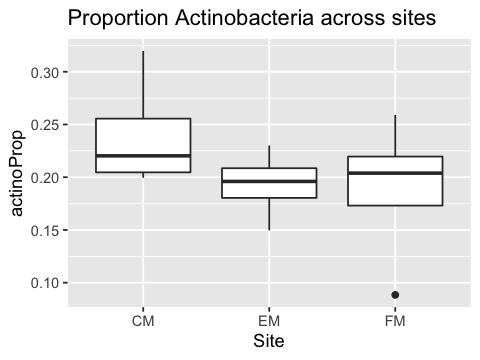

In [30]:
divMbox